In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv("pima_diabetes.csv")  


In [17]:
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
# بررسی داده‌های گم‌شده
missing_values = df.isnull().sum()
display(missing_values[missing_values > 0])

Series([], dtype: int64)

<Figure size 1200x800 with 0 Axes>

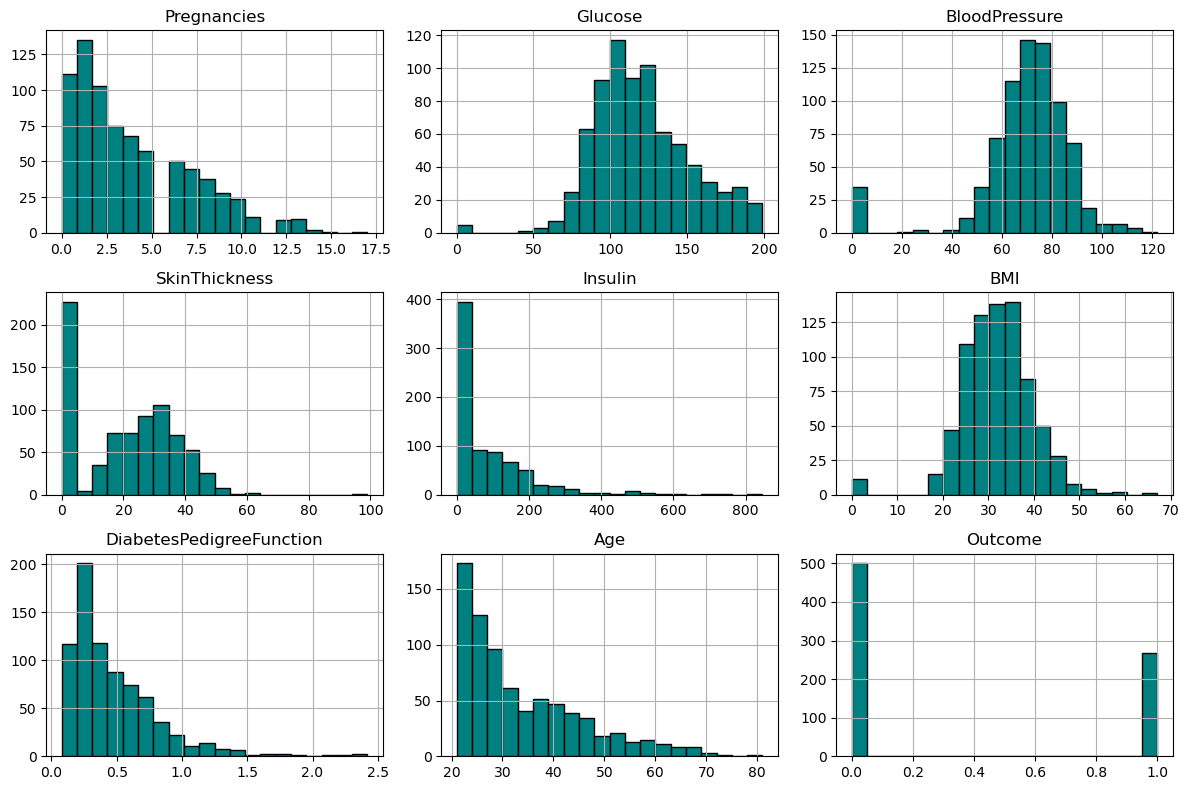

In [19]:
# نمایش توزیع متغیرهای عددی
plt.figure(figsize=(12, 8))
df.hist(figsize=(12, 8), bins=20, color='teal', edgecolor='black')
plt.tight_layout()
plt.show()

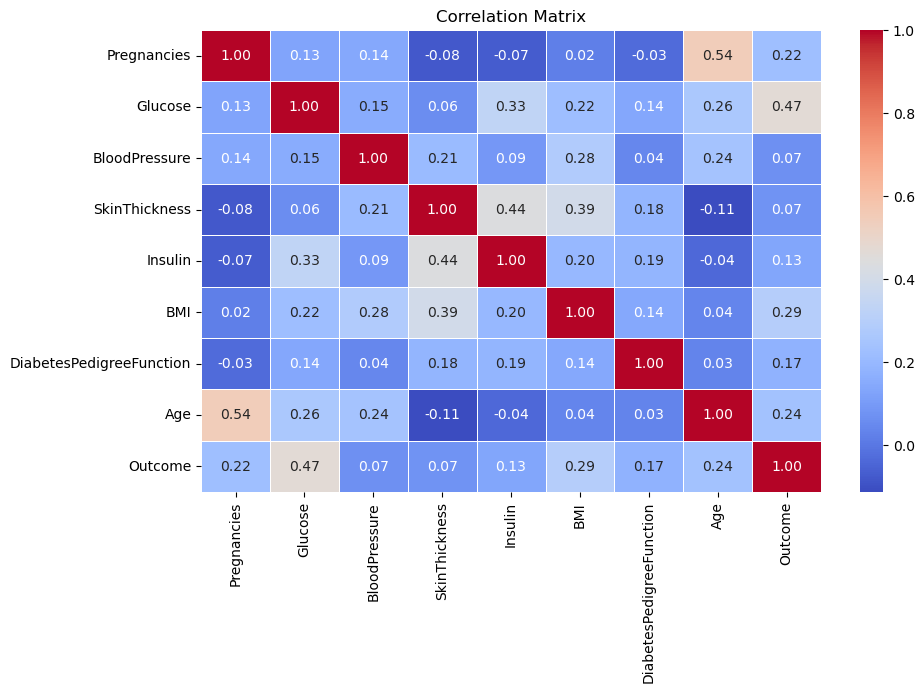

In [20]:
# بررسی همبستگی بین ویژگی‌ها
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_25604\2807372144.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outcome", y=column, data=df, palette=["blue", "red"])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_25604\2807372144.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outcome", y=column, data=df, palette=["blue", "red"])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_25604\2807372144.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outcome", y=column, data=df, palette=["blue", "red"])
C:\Users\ASUS\AppData\Local\Temp\ipykern

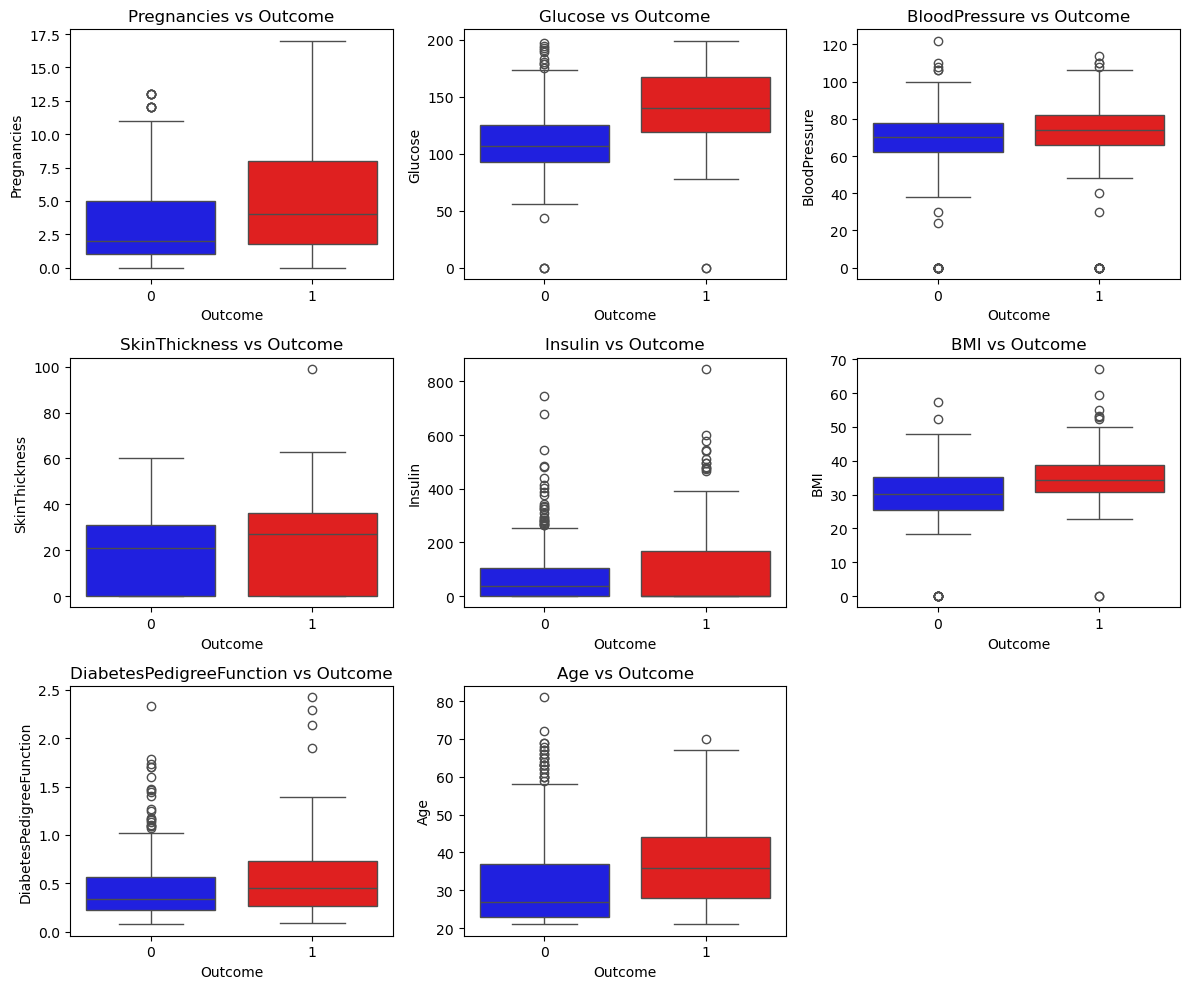

In [21]:
# بررسی توزیع ویژگی‌های عددی بر اساس داشتن دیابت یا نه
plt.figure(figsize=(12, 10))
for i, column in enumerate(df.columns[:-1]):  # Outcome را حذف می‌کنیم
    plt.subplot(3, 3, i+1)
    sns.boxplot(x="Outcome", y=column, data=df, palette=["blue", "red"])
    plt.title(f"{column} vs Outcome")
plt.tight_layout()
plt.show()


In [22]:
print("\nSkewness of numerical features:")
print(df.skew())
print("\nKurtosis of numerical features:")
print(df.kurtosis())


Skewness of numerical features:
Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

Kurtosis of numerical features:
Pregnancies                 0.159220
Glucose                     0.640780
BloodPressure               5.180157
SkinThickness              -0.520072
Insulin                     7.214260
BMI                         3.290443
DiabetesPedigreeFunction    5.594954
Age                         0.643159
Outcome                    -1.600930
dtype: float64


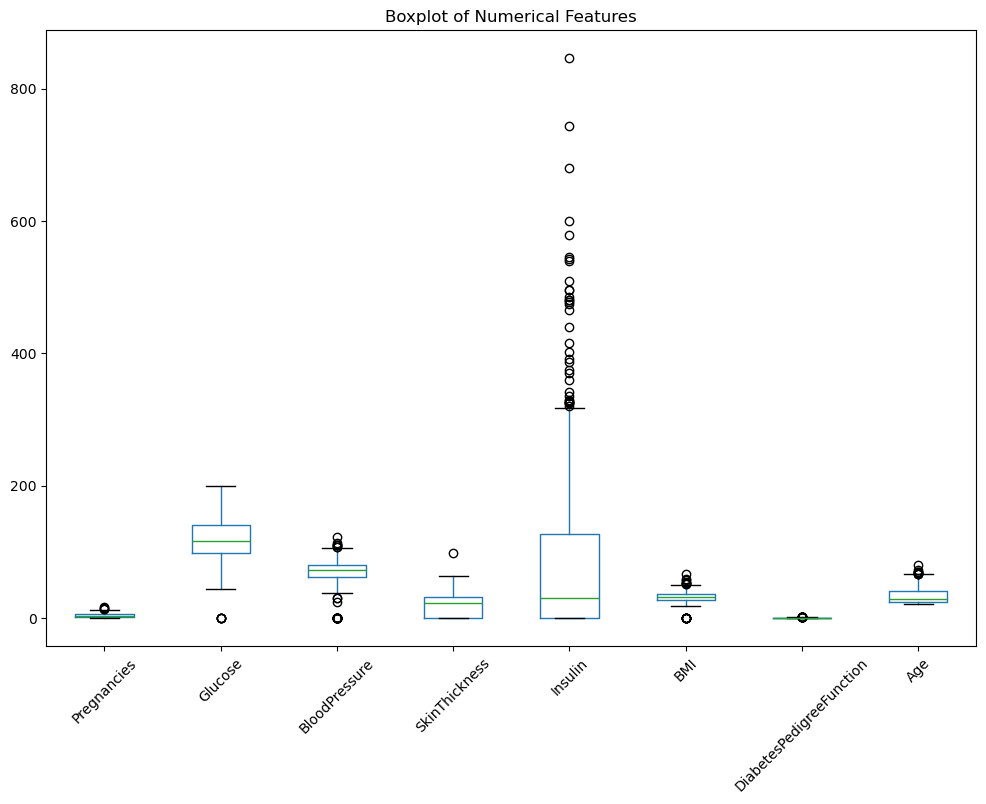

In [23]:
# بررسی مقادیر پرت (Outliers) با استفاده از نمودار Boxplot
plt.figure(figsize=(12, 8))
df.drop(columns=["Outcome"]).boxplot(rot=45, grid=False)
plt.title("Boxplot of Numerical Features")
plt.show()

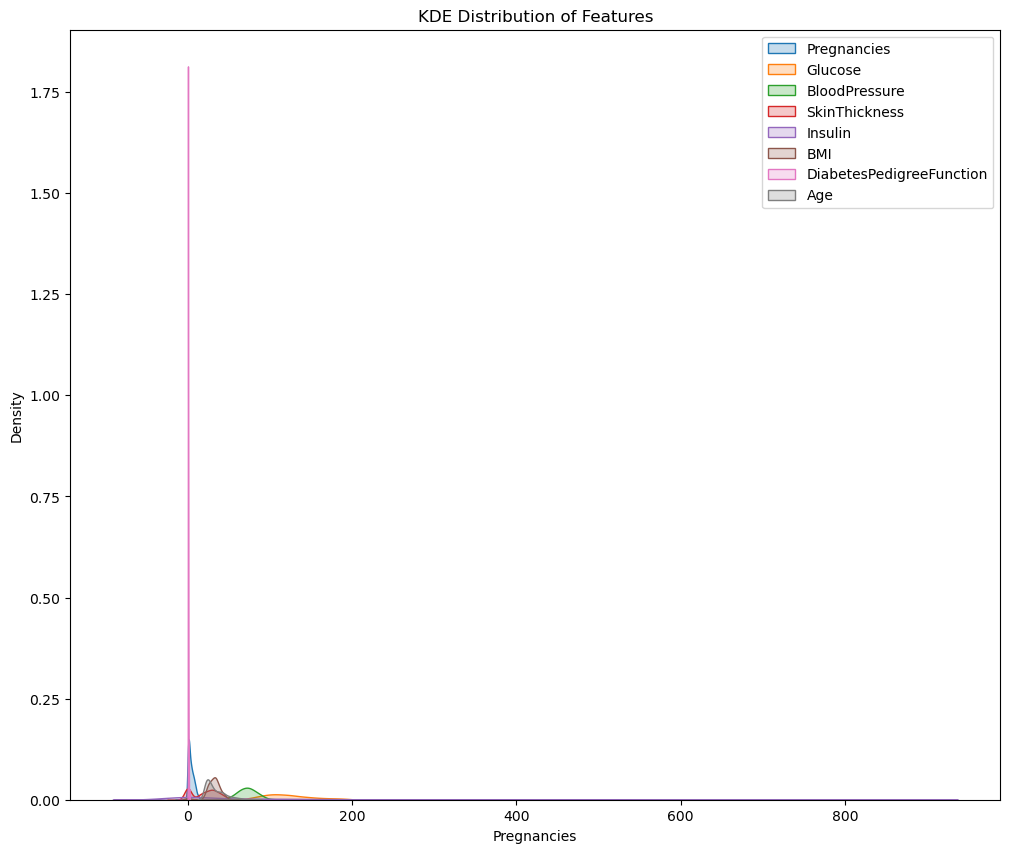

In [24]:
# بررسی توزیع ویژگی‌های عددی با KDE plot
plt.figure(figsize=(12, 10))
for column in df.columns[:-1]:  # Outcome را حذف می‌کنیم
    sns.kdeplot(df[column], label=column, fill=True)
plt.legend()
plt.title("KDE Distribution of Features")
plt.show()

خب پارت دوم این کار رو من تصمیم گرفتم بیایم یه سری کد برای بررسی احتمال دیابت توی این داده ها استفاده کنیم.الف: با استفاده از رگرسیون لجستیک

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import os

In [25]:
# تنظیم مسیر فایل دیتاست
file_path = "pima_diabetes.csv"
if not os.path.exists(file_path):
    print(f"Warning: The file '{file_path}' was not found. Please check the file path and try again.")
else:
    # خواندن دیتاست
    df = pd.read_csv(file_path)

In [31]:
# بررسی داده‌های گم‌شده
df = df.dropna()
    
# جداسازی ویژگی‌ها و برچسب‌ها
X = df.drop(columns=["Outcome"])
y = df["Outcome"]
    
# تقسیم داده‌ها به مجموعه آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [33]:
# نرمال‌سازی ویژگی‌ها
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# ایجاد مدل لجستیک رگرشن
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [34]:
# پیش‌بینی و ارزیابی مدل
y_pred = model.predict(X_test)
    
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7142857142857143

Confusion Matrix:
 [[82 18]
 [26 28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



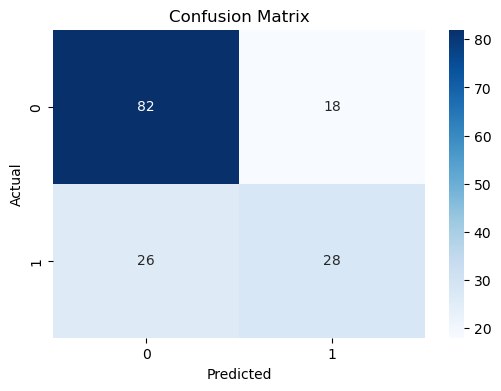

In [35]:
# نمایش ماتریس درهم‌ریختگی
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

خب حالا با نورال نتورک :

تابع:ReLU

دو تا HIDDEN LAYER و هم چنین ارزیابی بصورت سیگموئیده
شرمنده که دوباره کاری میشه و دوباره ایمپورت میکنم کتابخونه هارو هرچند نیازی نیست

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras 
import os

In [6]:
# تنظیم مسیر فایل دیتاست
file_path = "pima_diabetes.csv"
print(f"Checking if the file '{file_path}' exists...")
if not os.path.exists(file_path):
    print(f"Warning: The file '{file_path}' was not found. Please check the file path and try again.")
else:
    print(f"File '{file_path}' found. Reading the dataset...")
        # خواندن دیتاست
df = pd.read_csv(file_path)

Checking if the file 'pima_diabetes.csv' exists...
File 'pima_diabetes.csv' found. Reading the dataset...


In [7]:
 # بررسی داده‌های گم‌شده
 print(f"Checking for missing data...")
df = df.dropna()
print(f"Missing data dropped. Remaining rows: {df.shape[0]}")

Checking for missing data...
Missing data dropped. Remaining rows: 768


In [8]:
# جداسازی ویژگی‌ها و برچسب‌ها
X = df.drop(columns=["Outcome"])
y = df["Outcome"]
        
print(f"Splitting data into training and testing sets...")
        # تقسیم داده‌ها به مجموعه آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Splitting data into training and testing sets...


In [9]:
# نرمال‌سازی ویژگی‌ها
print(f"Normalizing features...")
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
        
print(f"Building the neural network model...")

Normalizing features...
Building the neural network model...


In [10]:
# ایجاد مدل شبکه عصبی
model = keras.Sequential([
            keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
            keras.layers.Dense(8, activation='relu'),
            keras.layers.Dense(1, activation='sigmoid')
        ])

In [11]:
 # کامپایل مدل
print(f"Compiling the model...")
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        
print(f"Training the model...")

Compiling the model...
Training the model...


In [12]:
# آموزش مدل
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)
        
print(f"Making predictions...")
        # ارزیابی مدل
y_pred = (model.predict(X_test) > 0.5).astype("int32")
        
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Epoch 1/50
39/39 [==============================] - 2s 17ms/step - loss: 0.7033 - accuracy: 0.5261 - val_loss: 0.6730 - val_accuracy: 0.6169
Epoch 2/50
39/39 [==============================] - 0s 3ms/step - loss: 0.6424 - accuracy: 0.6840 - val_loss: 0.6100 - val_accuracy: 0.6948
Epoch 3/50
39/39 [==============================] - 0s 3ms/step - loss: 0.5898 - accuracy: 0.7134 - val_loss: 0.5691 - val_accuracy: 0.7143
Epoch 4/50
39/39 [==============================] - 0s 3ms/step - loss: 0.5475 - accuracy: 0.7362 - val_loss: 0.5382 - val_accuracy: 0.7208
Epoch 5/50
39/39 [==============================] - 0s 2ms/step - loss: 0.5168 - accuracy: 0.7492 - val_loss: 0.5199 - val_accuracy: 0.7208
Epoch 6/50
39/39 [==============================] - 0s 3ms/step - loss: 0.4967 - accuracy: 0.7590 - val_loss: 0.5106 - val_accuracy: 0.7208
Epoch 7/50
39/39 [==============================] - 0s 2ms/step - loss: 0.4843 - accuracy: 0.7655 - val_loss: 0.5036 - val_accuracy: 0.7403
Epoch 8/50
39/39 [=

Plotting accuracy and loss graphs...


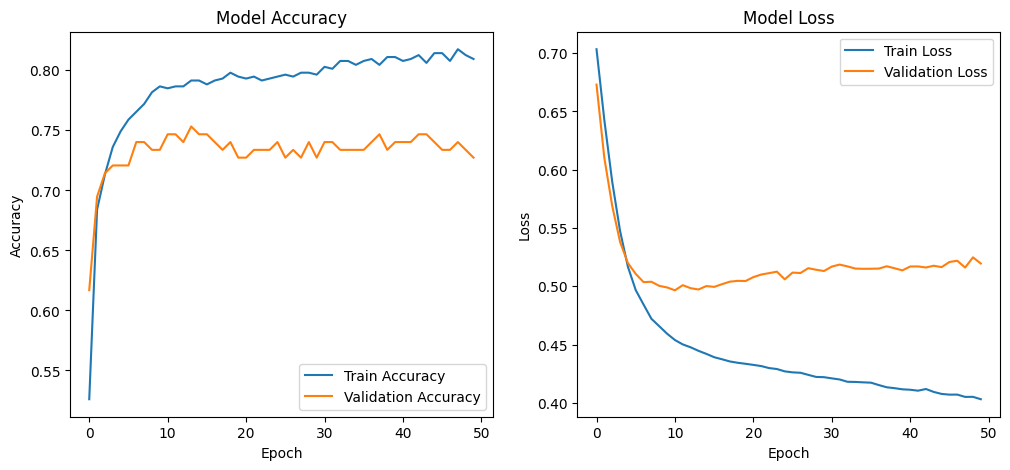

In [13]:
# نمایش نمودار دقت و خطا در طول دوران آموزش
print(f"Plotting accuracy and loss graphs...")
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
        
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
        
plt.show()

Plotting confusion matrix...


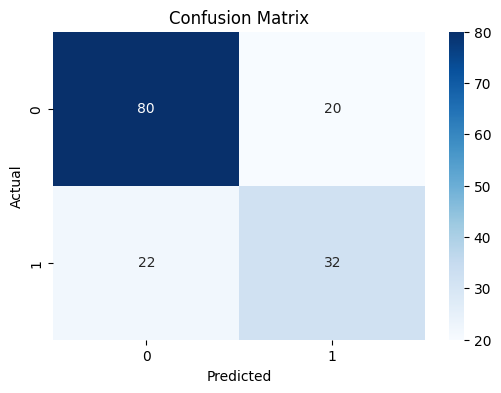

In [14]:
 print(f"Plotting confusion matrix...")
        # نمایش ماتریس درهم‌ریختگی
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()